# [PEFT - Parameter-Efficient Fine-Tuning](https://github.com/huggingface/peft)
- 딥러닝 모델의 크기가 증가함에 따라, 기존과 같이 태스크에 따른 모델 튜닝에 있어 기존과 같이 모든 파라미터를 미세조정하는 full-fine-tuning 방식은 자원 측면에서 점점 불가능해지고 있다.
- 이에 파라미터 효율적으로 fine-tuning 하는 PEFT 방법이 활발하게 연구되고 있다. PEFT는 다운스트림 작업의 성능을 유지하거나 심지어 향상시키면서 학습에 필요한 계산량, 혹은 모델의 크기를 줄이는 것을 목표로 한다.

## PEFT 장점
- `필요한 계산량의 감소`: 모델 크기를 줄이고, 중복된 파라미터를 제거하며 정밀도를 낮춤으로써 연산량을 줄인다.
- `추론 속도의 향상`: 모델 크기가 작아지고 계산 복잡도가 줄어듬에 따라 추론 속도가 감소하여 실시간 애플리케이션에 적합해진다.
- `리소스가 제한된 디바이스에서의 배포 개선`: 모바일 디바이스나 엣지 디바이스와 같이 제한적인 시소스에의 배포가 용이해진다.
- `비용 절감`: fine-tuning 및 추론에 드는 모든 비용이 절감된다
- `선능 유지 혹은 향상`: 모델 크기가 줄어들면서도 다운스트림 태스크에의 성능을 유지하거나 향상하는 것이 가능하다.

## [PEFT 기법들](https://huggingface.co/blog/trl-peft)

### Quantization

- 양자화는 모델 매개변수(가중치)의 정밀도를 낮춰 메모리 및 계산 요구 사항을 낮추는 기술이다다.
- 기존 딥러닝 모델에서 매개변수는 일반적으로 32비트 부동 소수점 숫자로 저장된다.
- 하지만 양자화를 사용하면 이러한 매개변수를 8비트 정수와 같이 더 낮은 비트 정밀도로 표현할 수 있다.
- 이렇게 정밀도를 낮추면 메모리 사용량이 크게 줄어들고 계산 속도가 빨라진다.

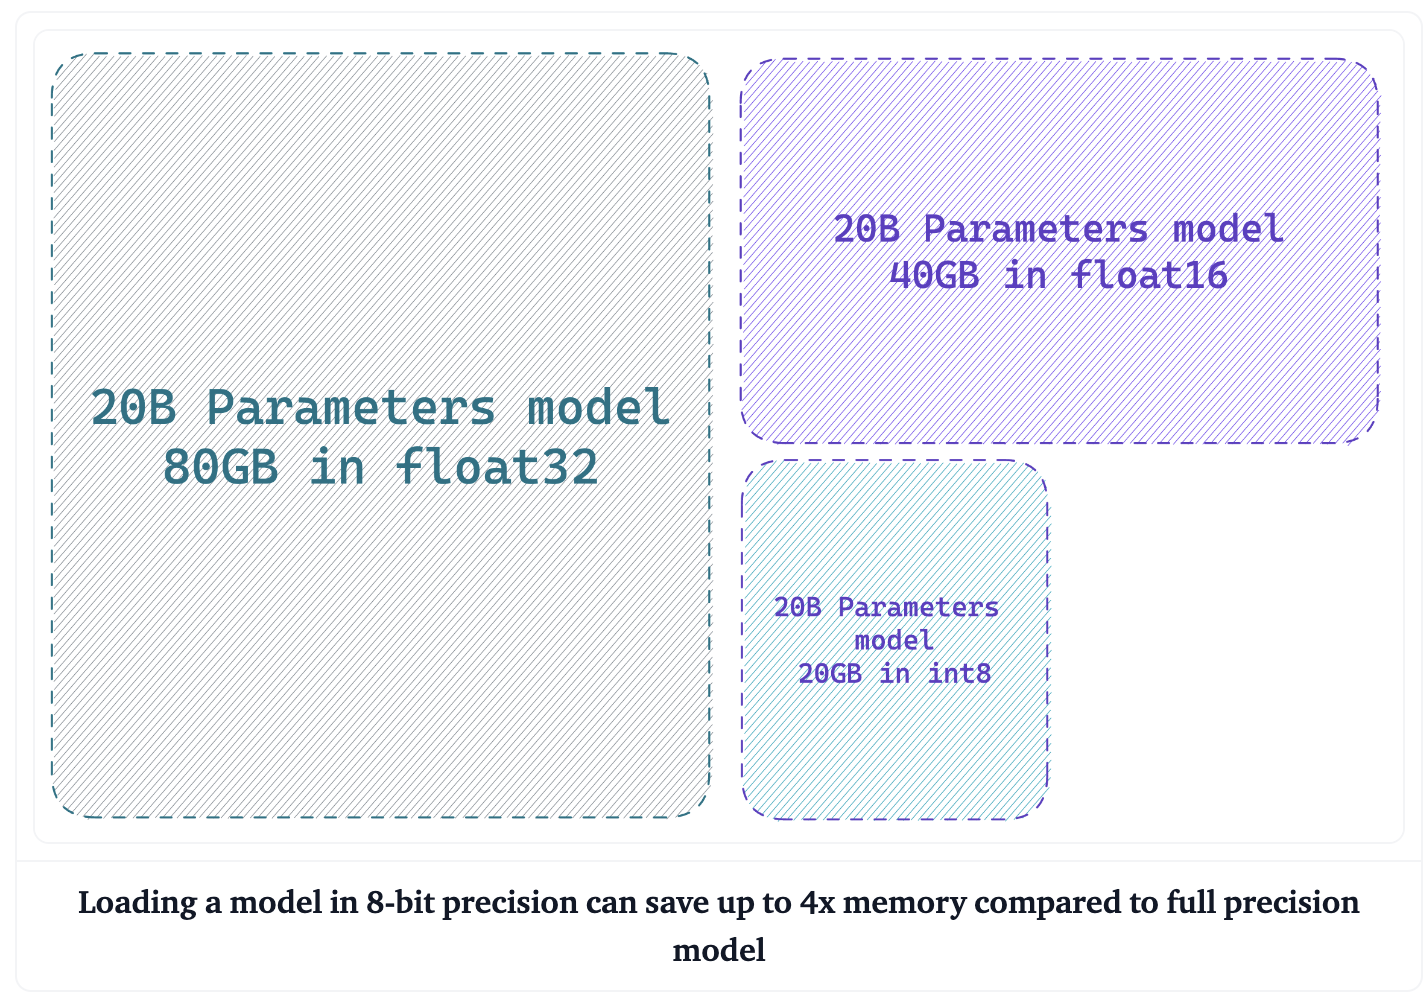

### Adapater Modules

- 어댑터 모듈은 원래의 파라미터를 수정하지 않고 특정 작업을 위해 사전 학습된 모델에 추가하는 경량 모듈을 말한다.
- 어댑터 모듈은 사전 학습된 파라미터의 대부분을 그대로 유지(freeze)하면서 모델이 작업별 정보를 학습할 수 있도록 함으로써 효율적인 미세 조정이 가능하도록 한다.
- 이 접근 방식은 전체 모델을 재학습하지 않고(freeze)도 어댑터를 다른 태스크들에 대해 쉽게 추가하거나 제거할 수 있으므로 유연성과 효율성을 제공한다.
- 어댑터 모듈은 모델의 성능을 유지하면서 학습 파라미터의 개수를 줄여, 훈련 시간과 학습에 소요하는 메모리 비용을 줄일 수 있다는 장점이 있습니다.

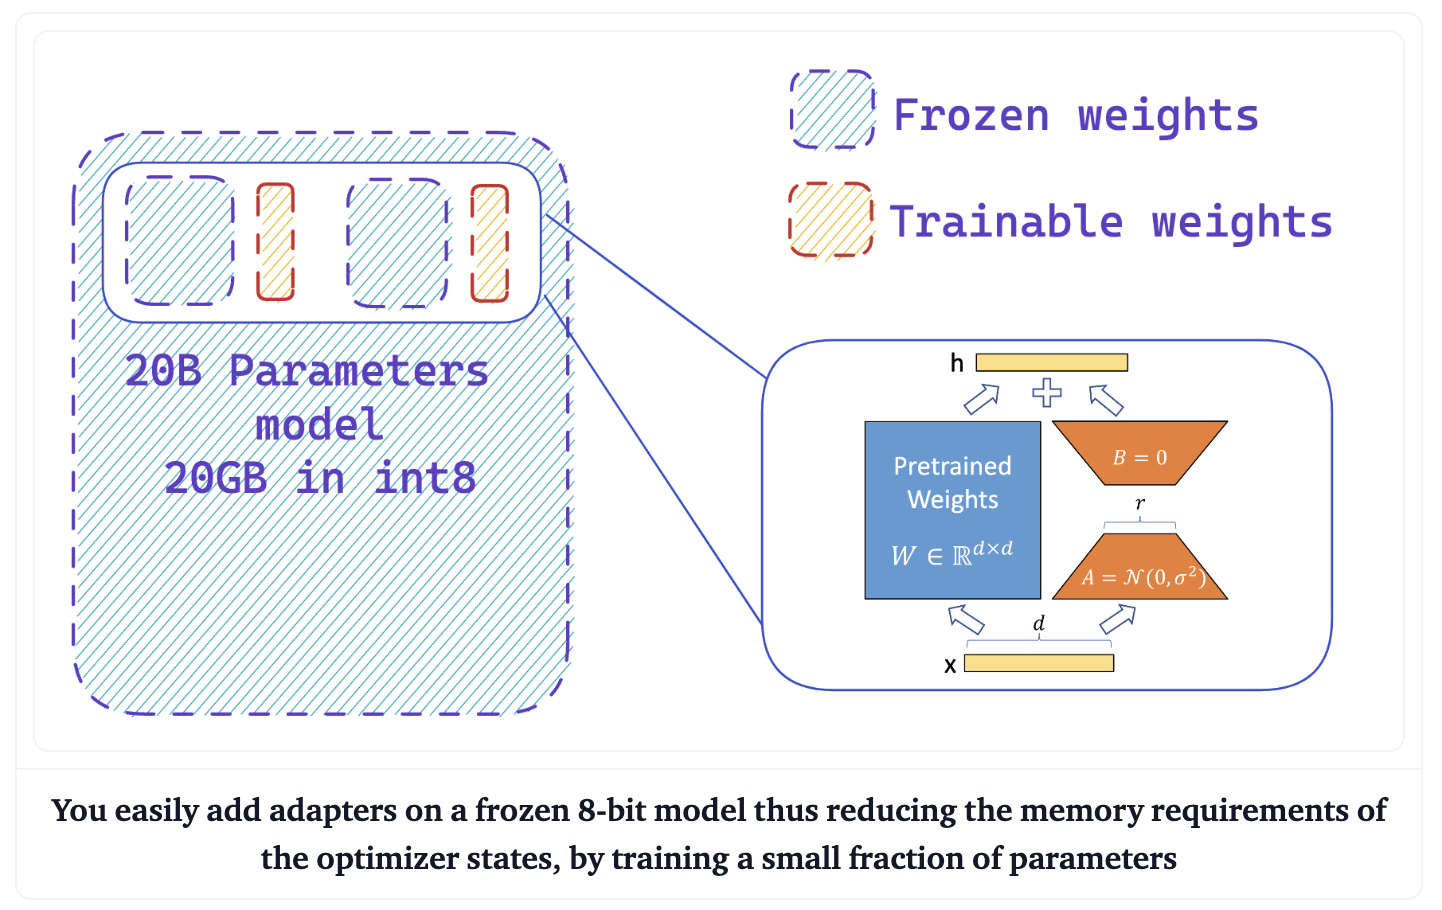

### [LoRA - Low Rank Adaptation](https://beeny-ds.tistory.com/entry/LORA-%EB%85%BC%EB%AC%B8-%EC%89%BD%EA%B2%8C-%EC%84%A4%EB%AA%85%ED%95%98%EA%B8%B0)
- Low-rank adaption(LoRA)은 Low-rank factorization 방법을 활용하여 LLM의 linear layer에 대한 업데이트를 근사화하는 기술이다.
- 이는 훈련 가능한 매개 변수의 수를 크게 줄이고 모델의 최종 성능에 거의 영향을 주지 않으면서 훈련 속도를 높인다.

![](https://huggingface.co/datasets/trl-internal-testing/example-images/resolve/main/blog/133_trl_peft/lora-animated.gif)

- 왼쪽에 있는 파란색 box 는 Pretrained Model 의 Weight 이다.
  - Transformer layer 의 Query, Key, Value, Output(=self attention) layer 의 차원은 (d x k) 이다.
  - d 는 hidden_size, k 는 웬만하면 d 와 같다.
  - Fully Freeze 되어 학습 시 weight update 가 되지 않는다.
    - gradient, optimize 관련된 tensor 값이 gpu 에 load 되지 않는다.
    - 즉, vram 을 save 할 수 있다.
- 오른쪽에 있는 주황색 A 가 LoRA_A layer 이다.
  - LoRA_A 는 nn.linear 이다.
  - {d x r} 의 차원을 가지고 있다.
  - d 는 hidden_size , r 은 사용자가 설장한 낮은 차원(r << d)이다.
- 오른쪽에 있는 주황색 B 가 LoRA_B layer 이다.
  - LoRA_B 는 nn.linear 이다.
  - {r x k} 의 차원을 가지고 있다. (k 는 웬만하면 d 와 같다.)
  - k 는 웬만하면 d 와 같고, r 은 사용자가 설장한 낮은 차원(r << d)이다.

즉, Model weight 를 freeze 하지만 Inference 시 사용되는 weight 값은 update 가 된다. Model weight 에 ( LoRA_B x LoRA_A ) 를 더해줬기 때문이다.

# [예제 - Fine-Tune Llama](https://mlabonne.github.io/blog/posts/Fine_Tune_Your_Own_Llama_2_Model_in_a_Colab_Notebook.html)

## Install & Import

In [ ]:
!pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7

In [ ]:
import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

## Parameters

- Model

In [ ]:
# The model that you want to train from the Hugging Face hub
model_name = "NousResearch/llama-2-7b-chat-hf"

# Fine-tuned model name
new_model = "llama-2-7b-miniguanaco"

- LoRA

In [ ]:
# LoRA attention dimension
lora_r = 64

# Alpha parameter for LoRA scaling
lora_alpha = 16

# Dropout probability for LoRA layers
lora_dropout = 0.1

- Bitsandbytes

In [ ]:
# Activate 4-bit precision base model loading
use_4bit = True

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type (fp4 or nf4)
bnb_4bit_quant_type = "nf4"

# Activate nested quantization for 4-bit base models (double quantization)
use_nested_quant = False

- Training

In [ ]:
# Output directory where the model predictions and checkpoints will be stored
output_dir = "./results"

# Number of training epochs
num_train_epochs = 1

# Enable fp16/bf16 training (set bf16 to True with an A100)
fp16 = False
bf16 = False

# Batch size per GPU for training
per_device_train_batch_size = 4

# Batch size per GPU for evaluation
per_device_eval_batch_size = 4

# Number of update steps to accumulate the gradients for
gradient_accumulation_steps = 1

# Enable gradient checkpointing
gradient_checkpointing = True

# Maximum gradient normal (gradient clipping)
max_grad_norm = 0.3

# Initial learning rate (AdamW optimizer)
learning_rate = 2e-4

# Weight decay to apply to all layers except bias/LayerNorm weights
weight_decay = 0.001

# Optimizer to use
optim = "paged_adamw_32bit"

# Learning rate schedule (constant a bit better than cosine)
lr_scheduler_type = "constant"

# Number of training steps (overrides num_train_epochs)
max_steps = -1

# Ratio of steps for a linear warmup (from 0 to learning rate)
warmup_ratio = 0.03

# Group sequences into batches with same length
# Saves memory and speeds up training considerably
group_by_length = True

# Save checkpoint every X updates steps
save_steps = 25

# Log every X updates steps
logging_steps = 25

- Supervised Fine-Tuning

In [ ]:
# Maximum sequence length to use
max_seq_length = None

# Pack multiple short examples in the same input sequence to increase efficiency
packing = False

# Load the entire model on the GPU 0
device_map = {"": 0}

## [Load Dataset](https://huggingface.co/datasets/mlabonne/guanaco-llama2-1k)

In [ ]:
# The instruction dataset to use
dataset_name = "nlpai-lab/openassistant-guanaco-ko" # 한국어 데이터셋
# dataset_name = "mlabonne/guanaco-llama2-1k"

- openassistant-guanaco-ko

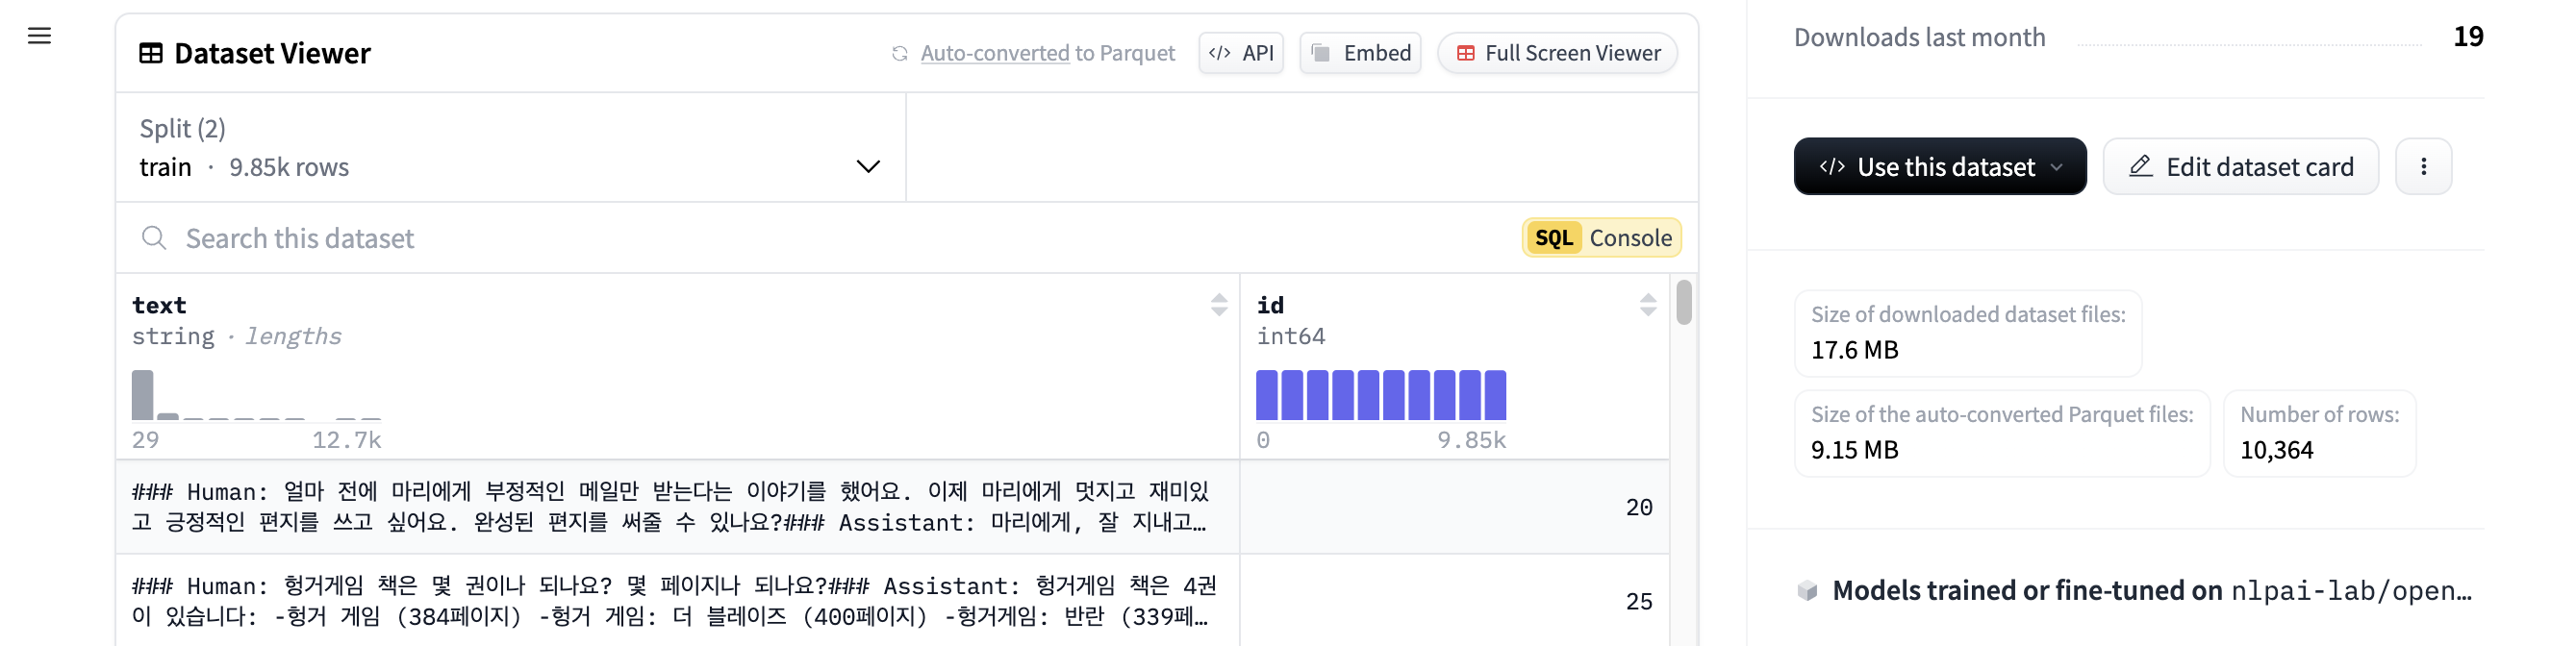

- mlabonne/guanaco-llama2-1k

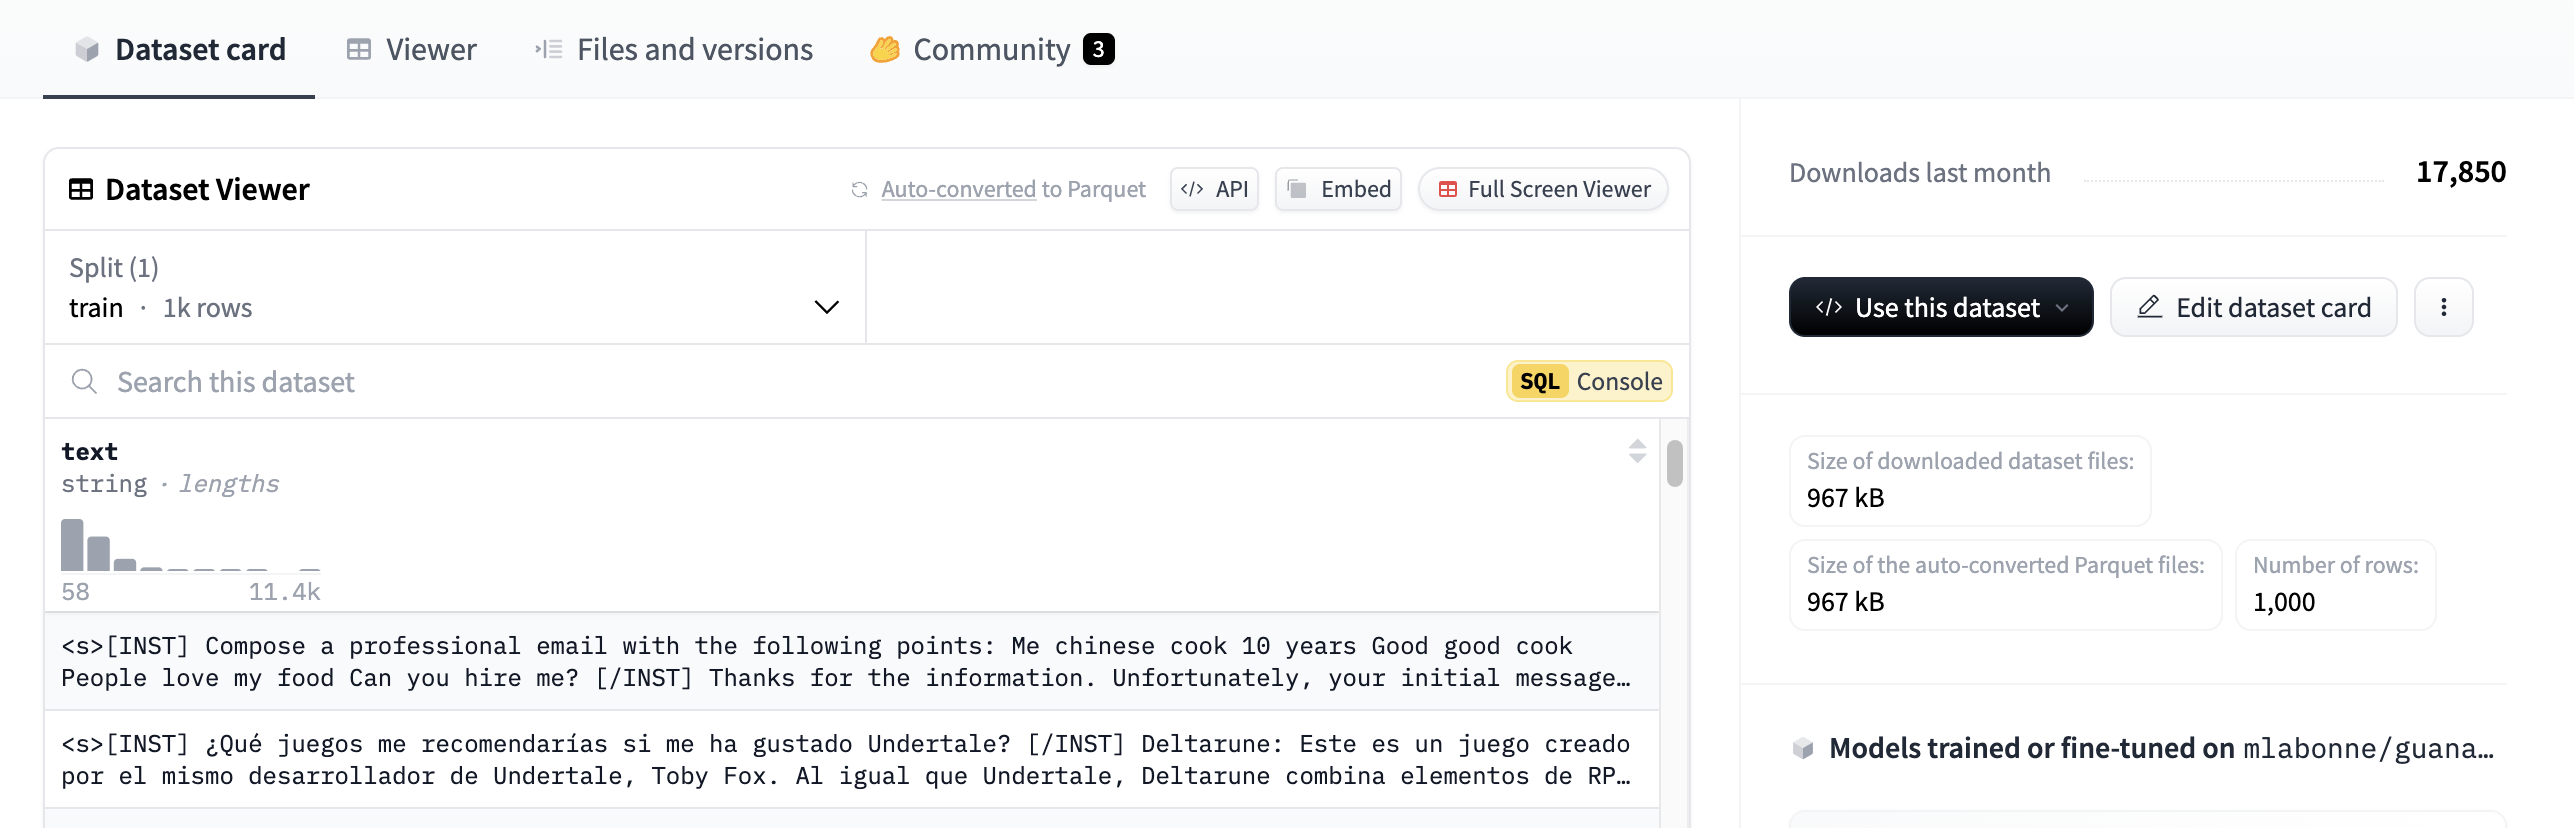

In [ ]:
# Load dataset (you can process it here)
dataset = load_dataset(dataset_name, split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Model with Quantization

In [ ]:
# Load tokenizer and model with QLoRA configuration
compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
)

# Check GPU compatibility with bfloat16
if compute_dtype == torch.float16 and use_4bit:
    major, _ = torch.cuda.get_device_capability()
    if major >= 8:
        print("=" * 80)
        print("Your GPU supports bfloat16: accelerate training with bf16=True")
        print("=" * 80)

# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map
)
model.config.use_cache = False
model.config.pretraining_tp = 1

Your GPU supports bfloat16: accelerate training with bf16=True


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

### Tokenizer

In [ ]:
# Load LLaMA tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right" # Fix weird overflow issue with fp16 training

## Training

- Set training parameters

In [ ]:
# Set training parameters
training_arguments = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    fp16=fp16,
    bf16=bf16,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=group_by_length,
    lr_scheduler_type=lr_scheduler_type,
    report_to="tensorboard",
    # Arguments
    gradient_checkpointing=True,
    gradient_checkpointing_kwargs={'use_reentrant':False} # OR gradient_checkpointing_kwargs={'use_reentrant':True}

)

### LoRA

In [ ]:
# Load LoRA configuration
peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM",
)

- Set supervised fine-tuning parameters

In [ ]:
# Set supervised fine-tuning parameters
trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    peft_config=peft_config,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    args=training_arguments,
    packing=packing,
)

/usr/local/lib/python3.10/dist-packages/peft/utils/other.py:102: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:159: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


- Train model

In [ ]:
# Train model
trainer.train()

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type:

Step,Training Loss
25,0.952800
50,0.965100
75,0.820400
100,0.898000
125,0.817000
150,0.868300
175,0.784700
200,0.843800
225,0.836700
250,0.872500


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an except

### Save trained model

In [ ]:
# Save trained model
trainer.model.save_pretrained(new_model)

## Result

### tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir results/runs

### Inference

In [ ]:
# Ignore warnings
logging.set_verbosity(logging.CRITICAL)

# Run text generation pipeline with our next model
prompt = "What is a large language model?"
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

In [ ]:
# Ignore warnings
logging.set_verbosity(logging.CRITICAL)

# Run text generation pipeline with our next model
prompt = "주식이란 무엇인가요?"
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

## Merge Model

In [ ]:
# Reload model in FP16 and merge it with LoRA weights
base_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map=device_map,
)
model = PeftModel.from_pretrained(base_model, new_model)
model = model.merge_and_unload()

# Reload tokenizer to save it
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

In [ ]:
# Ignore warnings
logging.set_verbosity(logging.CRITICAL)

# Run text generation pipeline with our next model
prompt = "What is a Hugging Face?"
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

In [ ]:
# Ignore warnings
logging.set_verbosity(logging.CRITICAL)

# Run text generation pipeline with our next model
prompt = "여행이란 무엇인가요?"
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

# [예제 - Fine-Tune of huggingfase](https://colab.research.google.com/drive/1jCkpikz0J2o20FBQmYmAGdiKmJGOMo-o?usp=sharing#scrollTo=WE5GJ6s7y0Xo)
- 생략

- https://huggingface.co/docs/peft/index